In [196]:
import acquire
import prepare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as met
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [197]:
df = acquire.get_telco_data()

In [198]:
df = prepare.prep_telco(df)

In [199]:
acquire.col_range(df)

,count,mean,std,min,25%,50%,75%,max,range
internet_service_type_id,7032.0,1.872582,0.737271,1.00,1.0000,2.000,2.0000,3.00,2.0
payment_type_id,7032.0,2.315557,1.149523,1.00,1.0000,2.000,3.0000,4.00,3.0
contract_type_id,7032.0,1.688567,0.832934,1.00,1.0000,1.000,2.0000,3.00,2.0
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00,1.0
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00,71.0
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75,100.5
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80,8666.0
gender_encoded,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00,1.0
partner_encoded,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00,1.0
dependents_encoded,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00,1.0


In [200]:
num, cat = acquire.dtypes_to_list(df)

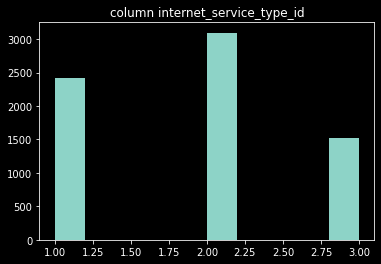

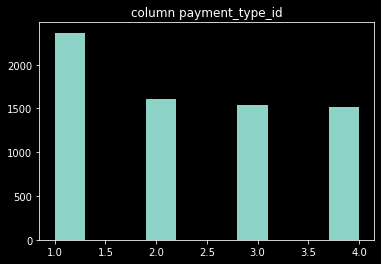

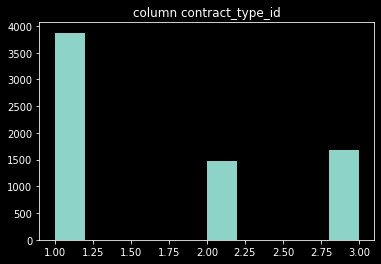

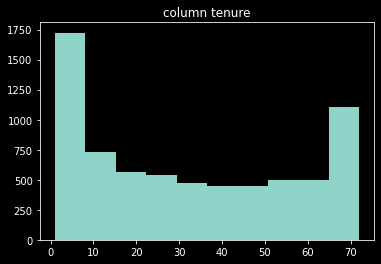

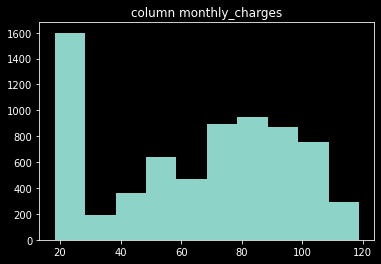

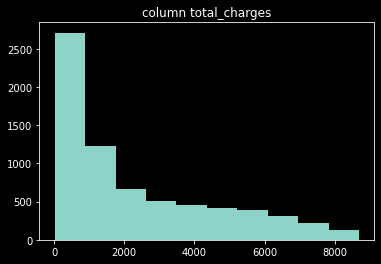

In [201]:
prepare.num_dist(df)

In [202]:
train, validate, test = prepare.data_split(df, 'churn')

In [203]:
train.head()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3727,3,2,3,0,45,20.35,929.20,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4271,3,2,1,0,34,20.65,716.40,1,1,1,...,0,1,0,0,0,0,1,0,0,1
6317,3,4,1,0,15,19.45,340.85,0,1,0,...,0,1,0,0,0,0,1,1,0,0
489,1,2,1,0,12,61.65,713.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3771,1,3,1,0,7,62.80,418.30,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [204]:
train.shape, validate.shape, test.shape

((4218, 34), (1407, 34), (1407, 34))

In [205]:
X_train = train[['monthly_charges', 'payment_type_id', 'tenure', 'gender_encoded', 'senior_citizen']]
X_validate = validate[['monthly_charges', 'payment_type_id', 'tenure', 'gender_encoded', 'senior_citizen']]
X_test = test[['monthly_charges', 'payment_type_id', 'tenure', 'gender_encoded', 'senior_citizen']]
X_train.shape, X_validate.shape, X_test.shape

((4218, 5), (1407, 5), (1407, 5))

In [206]:
y_train = train.churn
y_validate = validate.churn
y_test = test.churn


------
#### Baseline Accuracy

In [207]:
baseline = y_train.mode()
matches_baseline_pred = y_train == 0

baseline_accuracy = matches_baseline_pred.mean()
print(f"Baseline Accuracy is : {baseline_accuracy}")

Baseline Accuracy is : 0.7342342342342343


------

In [208]:
print(y_train[:5])
X_train.head()

3727    0
4271    0
6317    0
489     1
3771    0
Name: churn, dtype: int64


,monthly_charges,payment_type_id,tenure,gender_encoded,senior_citizen
3727,20.35,2,45,0,0
4271,20.65,2,34,1,0
6317,19.45,4,15,0,0
489,61.65,2,12,1,0
3771,62.80,3,7,1,0


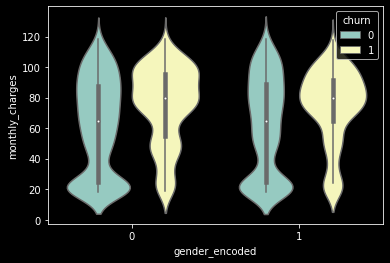

In [209]:
sns.violinplot(x='gender_encoded',y='monthly_charges', data=train, hue = 'churn')
plt.show()

In [210]:
acquire.col_range(train)

,count,mean,std,min,25%,50%,75%,max,range
internet_service_type_id,4218.0,1.879090,0.739857,1.00,1.0000,2.000,2.000,3.00,2.00
payment_type_id,4218.0,2.339260,1.154377,1.00,1.0000,2.000,3.000,4.00,3.00
contract_type_id,4218.0,1.688715,0.835012,1.00,1.0000,1.000,2.000,3.00,2.00
senior_citizen,4218.0,0.160028,0.366676,0.00,0.0000,0.000,0.000,1.00,1.00
tenure,4218.0,32.609056,24.696663,1.00,8.2500,30.000,56.000,72.00,71.00
monthly_charges,4218.0,64.758250,30.282198,18.25,34.7000,70.200,90.250,118.65,100.40
total_charges,4218.0,2298.477584,2276.065927,18.85,392.6625,1406.325,3861.425,8594.40,8575.55
gender_encoded,4218.0,0.499526,0.500059,0.00,0.0000,0.000,1.000,1.00,1.00
partner_encoded,4218.0,0.482456,0.499751,0.00,0.0000,0.000,1.000,1.00,1.00
dependents_encoded,4218.0,0.301091,0.458786,0.00,0.0000,0.000,1.000,1.00,1.00


In [211]:
# Wah this is the best, it can filter your new column, so now I can get a visual count of number of seniors who churned.
# train['senior_churn'] = 0
# train.loc[train['senior_citizen'] == 1, 'senior_churn'] = 1
# train.loc[train['churn'] == 0, 'senior_churn'] = 0
# train.senior_churn.value_counts(), train.senior_citizen.value_counts()

In [212]:
# pd.crosstab(train.senior_citizen,train.senior_churn)

In [213]:
# pd.crosstab(train.senior_citizen,train.senior_churn)[1:2]

In [214]:
# senior = train.senior_citizen[train.senior_citizen == 1].count()

In [215]:
# senior

In [216]:
#def plot_stack(column_1, column_2):
 #plot_stck=pd.crosstab(index=column_1, columns=column_2)
 #plot_stck.plot(kind='bar', figsize=(8,8), stacked=True)
 #return
 #plot_stack(train_data_wmis['max_glu_serum'], train_data_wmis['readmitted'])

------

Starting MVP, modelling.

In [217]:
clf = DecisionTreeClassifier(max_depth=3, random_state=342)
# Baseline accuracy repeats 342 over and over so I thought it would be fun to use it.

In [262]:
clf = clf.fit(X_train, y_train)

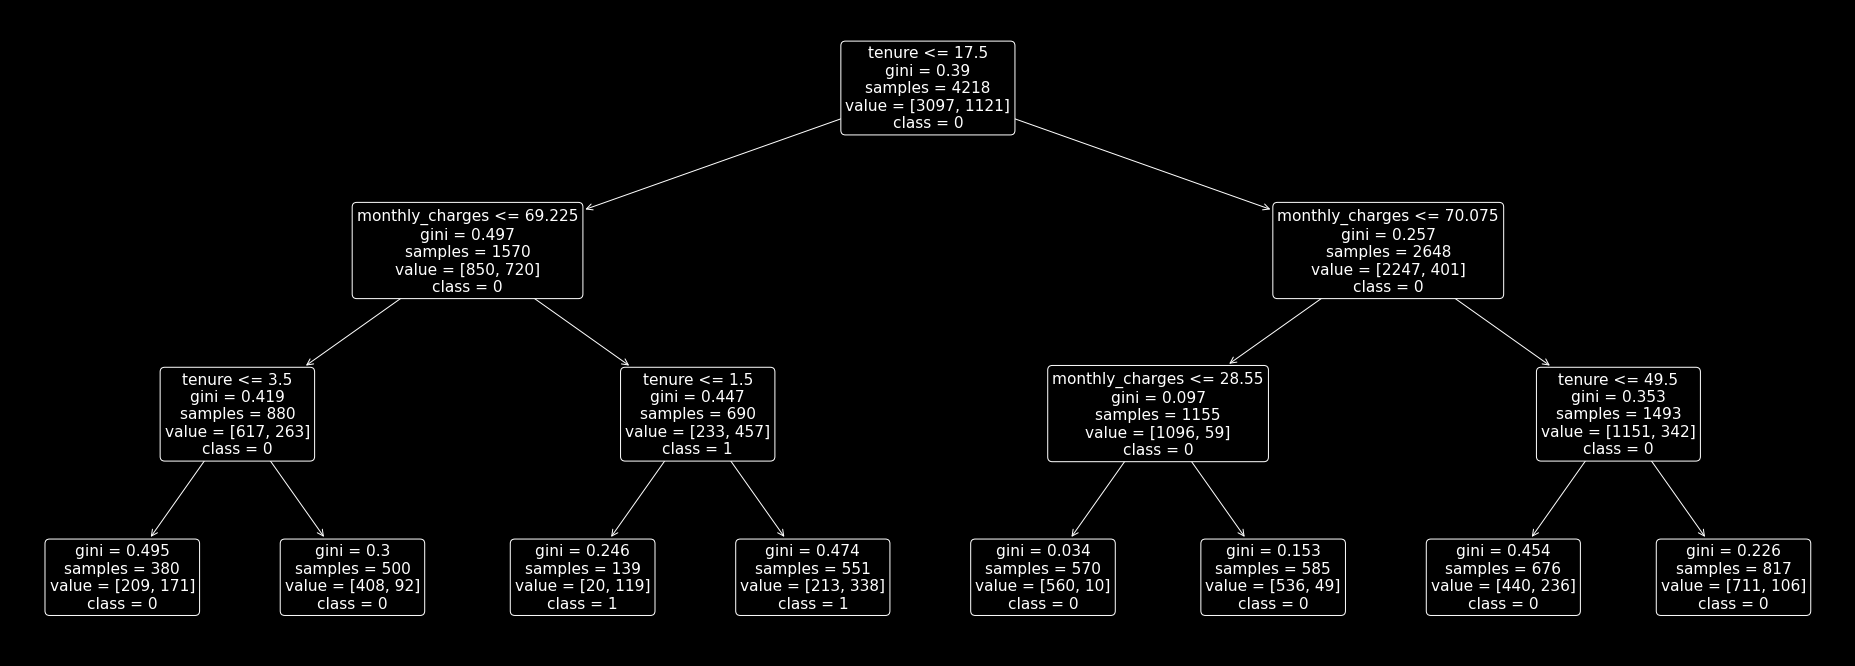

In [264]:
plt.figure(figsize=(33,12))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)
plt.show()

In [220]:
y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [221]:
y_pred_prob = clf.predict_proba(X_train)
y_pred_prob[:5]

array([[0.98245614, 0.01754386],
       [0.98245614, 0.01754386],
       [0.816     , 0.184     ],
       [0.816     , 0.184     ],
       [0.816     , 0.184     ]])

In [257]:
TP = 457
TN = 2864
FP = 233
FN = 664
pd.crosstab(y_train,y_pred)

col_0,0,1
churn,,
0,2864,233
1,664,457


In [258]:
print(f" The Accuracy of 'Tree 1' is ~{round(clf.score(X_train, y_train), 2)}")

 The Accuracy of 'Tree 1' is ~0.79


In [259]:
report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.811791,0.662319,0.78734,0.737055,0.772067
recall,0.924766,0.407672,0.78734,0.666219,0.787340
f1-score,0.864604,0.504694,0.78734,0.684649,0.768952
support,3097.000000,1121.000000,0.78734,4218.000000,4218.000000


In [260]:
print(f'accuracy: {met.accuracy_score(train.churn, clf.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn, clf.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn, clf.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn, clf.predict(X_train)):.2%}')
print(f'support: {clf.predict(X_train).sum()}')

accuracy: 78.73%
true positive rate / recall: 40.77%
true negative rate / Specificity: 92.48%
false potivie rate / Percision: 66.23%
false negative rate: 81.18%
f1-score: 50.47%
support: 690


In [261]:
print('Accuracy of Tree 1 on validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))

Accuracy of Tree 1 on validate set: 0.77


-----

Random Forest 1

In [227]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=3, random_state=342)

In [228]:
rf = rf.fit(X_train, y_train)

In [229]:
y_pred2 = rf.predict(X_train)
y_pred_prob2 = rf.predict_proba(X_train)
y_pred2[:5], y_pred_prob2[:5]

(array([0, 0, 0, 0, 0]),
 array([[0.9188342 , 0.0811658 ],
        [0.91375446, 0.08624554],
        [0.84903093, 0.15096907],
        [0.78594444, 0.21405556],
        [0.7673    , 0.2327    ]]))

In [230]:
print(f" The Accuracy of 'Random Forest 1' is ~{round(rf.score(X_train, y_train), 2)}")

 The Accuracy of 'Random Forest 1' is ~0.78


In [265]:
TP = 344
TN = 2960
FP = 137
FN = 777
pd.crosstab(y_train,y_pred2)

col_0,0,1
churn,,
0,2960,137
1,777,344


In [266]:
report = classification_report(y_train, y_pred2, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.792079,0.715177,0.78331,0.753628,0.771641
recall,0.955764,0.306869,0.78331,0.631316,0.783310
f1-score,0.866257,0.429463,0.78331,0.647860,0.750172
support,3097.000000,1121.000000,0.78331,4218.000000,4218.000000


In [269]:
print(f'accuracy: {met.accuracy_score(train.churn, rf.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn, rf.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn, rf.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn, rf.predict(X_train)):.2%}')
print(f'support: {rf.predict(X_train).sum()}')

accuracy: 78.33%
true positive rate / recall: 30.69%
true negative rate / Specificity: 95.58%
false potivie rate / Percision: 71.52%
false negative rate: 79.21%
f1-score: 42.95%
support: 481


In [270]:
print('Accuracy of Random Forest on validate set: {:.2f}'.format(rf.score(X_validate, y_validate)))


Accuracy of Random Forest on validate set: 0.77


----
KNN 1 Distance and Uniform

In [294]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn2 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn = knn.fit(X_train, y_train)
knn2 = knn2.fit(X_train, y_train)

In [295]:
y_pred_k = knn.predict(X_train)
y_pred_k2 = knn2.predict(X_train)
y_pred_proba_k = knn.predict_proba(X_train)
y_pred_proba_k2 = knn2.predict_proba(X_train)

In [320]:
print('Accuracy of KNN classifier [distance] on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier [uniform] on training set: {:.2f}'.format(knn2.score(X_train, y_train)))

Accuracy of KNN classifier [distance] on training set: 1.00
Accuracy of KNN classifier [uniform] on training set: 0.86


In [297]:
TP = 1106
TN = 3094
FP = 3
FN = 15
pd.crosstab(y_train, y_pred_k)

col_0,0,1
churn,,
0,3094,3
1,15,1106


In [298]:
TP1 = 611
TN1 = 2859
FP1 = 238
FN1 = 510
pd.crosstab(y_train, y_pred_k2)

col_0,0,1
churn,,
0,2886,211
1,379,742


In [299]:
report = classification_report(y_train, y_pred_k, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.995175,0.997295,0.995733,0.996235,0.995739
recall,0.999031,0.986619,0.995733,0.992825,0.995733
f1-score,0.997100,0.991928,0.995733,0.994514,0.995725
support,3097.000000,1121.000000,0.995733,4218.000000,4218.000000


In [300]:
report2 = classification_report(y_train, y_pred_k2, output_dict=True)
pd.DataFrame(report2)

,0,1,accuracy,macro avg,weighted avg
precision,0.883920,0.778594,0.860123,0.831257,0.855928
recall,0.931870,0.661909,0.860123,0.796889,0.860123
f1-score,0.907262,0.715526,0.860123,0.811394,0.856305
support,3097.000000,1121.000000,0.860123,4218.000000,4218.000000


In [301]:
print(f'accuracy: {met.accuracy_score(train.churn, knn.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn, knn.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn, knn.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn, knn.predict(X_train)):.2%}')
print(f'support: {knn.predict(X_train).sum()}')

accuracy: 99.57%
true positive rate / recall: 98.66%
true negative rate / Specificity: 99.90%
false potivie rate / Percision: 99.73%
false negative rate: 99.52%
f1-score: 99.19%
support: 1109


In [302]:
print(f'accuracy: {met.accuracy_score(train.churn, knn2.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn, knn2.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN1)/(FP1+TN1):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn, knn2.predict(X_train)):.2%}')
print(f'false negative rate: {(TN1)/(TN1+FN1):.2%}')
print(f'f1-score: {met.f1_score(train.churn, knn2.predict(X_train)):.2%}')
print(f'support: {knn2.predict(X_train).sum()}')

accuracy: 86.01%
true positive rate / recall: 66.19%
true negative rate / Specificity: 92.32%
false potivie rate / Percision: 77.86%
false negative rate: 84.86%
f1-score: 71.55%
support: 953


In [303]:
# Checking validate on the ~99.81% accuracy model. Is there overfitting?
print('Accuracy of KNN classifier on validate set: {:.2f}'.format(knn.score(X_validate, y_validate)))
print('Accuracy of KNN classifier on validate set: {:.2f}'.format(knn2.score(X_validate, y_validate)))


Accuracy of KNN classifier on validate set: 0.76


In [319]:
# what about uniform weight?
print('Accuracy of KNN classifier on validate set: {:.2f}'.format(knn2.score(X_validate, y_validate)))


Accuracy of KNN classifier on validate set: 0.75


-----
Logistic Regression

In [246]:
# df1 = acquire.get_telco_data()

In [247]:
# df1['churn_encoded'] = df1.churn.map({'Yes': 1, 'No': 0})
# df1['paperless_encoded'] = df1.churn.map({'Yes': 1, 'No': 0})
# df1['churn_encoded'] = df1.churn.map({'Yes': 1, 'No': 0})
# df1['churn_encoded'] = df1.churn.map({'Yes': 1, 'No': 0})
# df1 = df1.drop(columns={'Unnamed: 0', 'customer_id', 'gender', 'paperless_billing', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'total_charges', 'internet_service_type', 'churn_month', 'churn'})
# df1 = df1.rename(columns={'churn_encoded' : 'churn', 'paperless_encoded' : 'paperless_billing'})



In [248]:
# df1.head()

In [249]:
#train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_X_y(df1, 'churn')

In [250]:
#df.head()

In [251]:
#df1 = df.drop(columns={'senior_citizen' ,'online_security_No internet service', 'online_security_Yes', 'online_backup_No internet service', 'online_backup_Yes','total_charges', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'streaming_tv_Yes', 'streaming_movies_No internet service', 'streaming_movies_Yes', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'phone_service_encoded', 'multiple_lines_No phone service', 'device_protection_No internet service', 'device_protection_Yes', 'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No internet service'})

In [252]:
#df1.head()

In [307]:
logit = LogisticRegression(C=1, random_state=342, class_weight='balanced', intercept_scaling=1)

In [308]:
logit = logit.fit(X_train,y_train)

In [309]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.03084657 -0.19585038 -0.05111777  0.00333096  0.6633465 ]]
Intercept: 
 [-0.42916698]


In [310]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

In [311]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.74


In [313]:
TP = 835
TN = 2278
FP = 819
FN = 286
pd.crosstab(y_train, y_pred)

col_0,0,1
churn,,
0,2278,819
1,286,835


In [316]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.80      3097
           1       0.50      0.74      0.60      1121

    accuracy                           0.74      4218
   macro avg       0.70      0.74      0.70      4218
weighted avg       0.79      0.74      0.75      4218



In [317]:
print(f'accuracy: {met.accuracy_score(train.churn, logit.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn, logit.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn, logit.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn, logit.predict(X_train)):.2%}')
print(f'support: {logit.predict(X_train).sum()}')

accuracy: 73.80%
true positive rate / recall: 74.49%
true negative rate / Specificity: 73.56%
false potivie rate / Percision: 50.48%
false negative rate: 88.85%
f1-score: 60.18%
support: 1654


In [318]:
print('Accuracy of Logistic Regression on traing set: {:.2f}'.format(logit.score(X_validate, y_validate)))


Accuracy of Logistic Regression on traing set: 0.72


------
#### Confusion Matrix

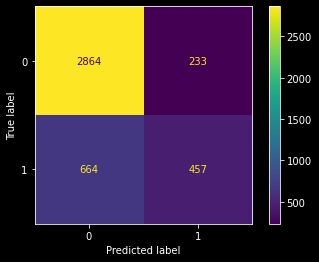

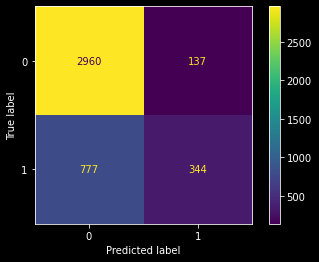

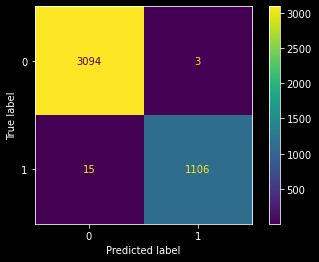

In [255]:
cm = confusion_matrix(y_train,y_pred)
disp = met.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
cm2 = confusion_matrix(y_train,y_pred2)
disp2 = met.ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf.classes_)
cm3 = confusion_matrix(y_train,y_pred_k)
disp3 = met.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=knn.classes_)

disp.plot()
disp2.plot()
disp3.plot()
plt.show()

----------
#### probability csv creation

In [256]:
proba_test = final_model.predict_proba(X_test)
proba_df = pd. DataFrame(proba_test, columns=final_model.classes_.tolist())
proba_df.head()

NameError: name 'final_model' is not defined

In [ ]:
reset_test = test.reset_index()
reset_test.head()

In [ ]:
test_prob_df = pd.concat([reset_test, proba_df], axis=1)
test_prob_df.head()

In [ ]:
test_prob_df['predicted'] = predicted_test
test_prob_df.head()

In [ ]:
pred_csv = test_prob_df[['col1', 'col2', 'col3', 'etc', 'predicted']]
pred_csv.head()

In [ ]:
pred_csv.to_csv('predictions.csv')